In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
calories = pd.read_csv("calories.csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
calories.shape

(15000, 2)

In [5]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [6]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [7]:
calories.duplicated().sum()

0

In [8]:
exercise = pd.read_csv("exercise.csv")

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exercise.shape

(15000, 8)

In [11]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [12]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
exercise.duplicated().sum()

0

In [14]:
#combining two dataset

calories_data = pd.concat([exercise, calories["Calories"]], axis=1)

In [15]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
calories_data.shape

(15000, 9)

In [17]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [19]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


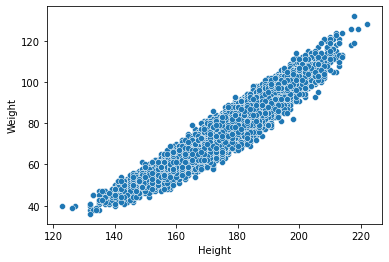

In [20]:
sns.scatterplot(x = calories_data["Height"], y = calories_data["Weight"])
plt.show()

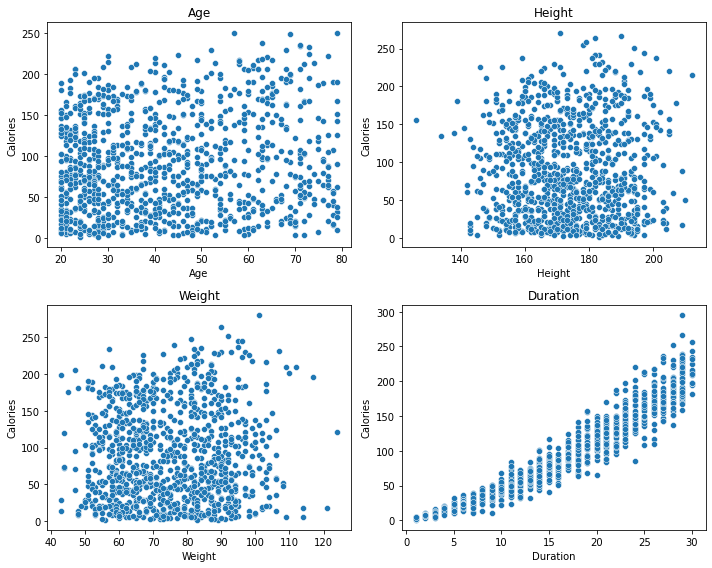

In [21]:
features = ["Age", "Height", "Weight", "Duration"]
  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each column and plot the data
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    x = calories_data.sample(1000)
    if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
        sns.scatterplot(x = x[col], y = x["Calories"], ax = ax)
        ax.set_title(col)
plt.tight_layout()
plt.show()

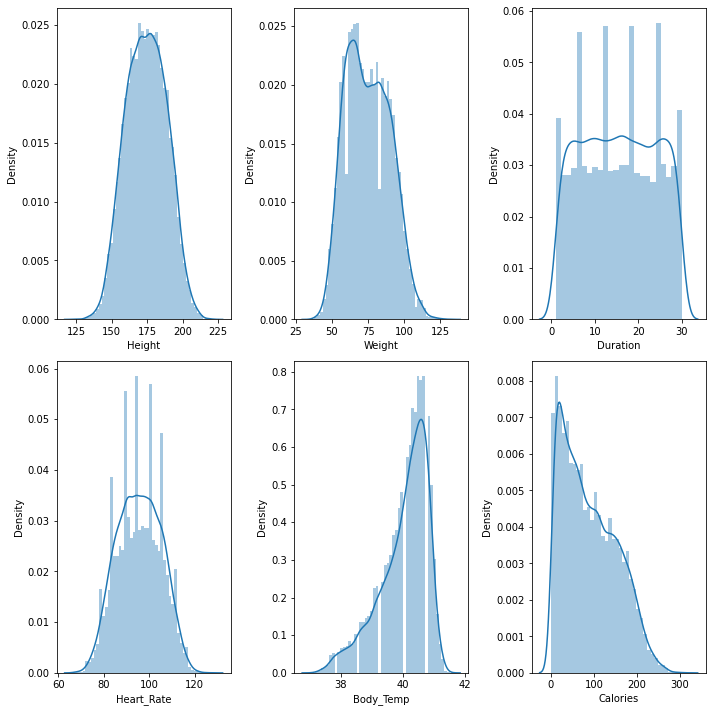

In [22]:
features = calories_data.select_dtypes(include='float').columns
  
plt.subplots(figsize=(10, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(calories_data[col])
plt.tight_layout()
plt.show()

In [23]:
calories_data["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [24]:
#calories_data["Gender"] = pd.Categorical(calories_data["Gender"])
#calories_data["Gender"] = calories_data["Gender"].cat.codes
#calories_data["Gender"] = calories_data["Gender"].replace({-1: np.nan})

calories_data.replace({"Gender":{"female": 0, "male": 1}}, inplace = True)

In [25]:
#sns.countplot(calories_data["Gender"].value_counts())

In [26]:
correlation = calories_data.corr()

<AxesSubplot: >

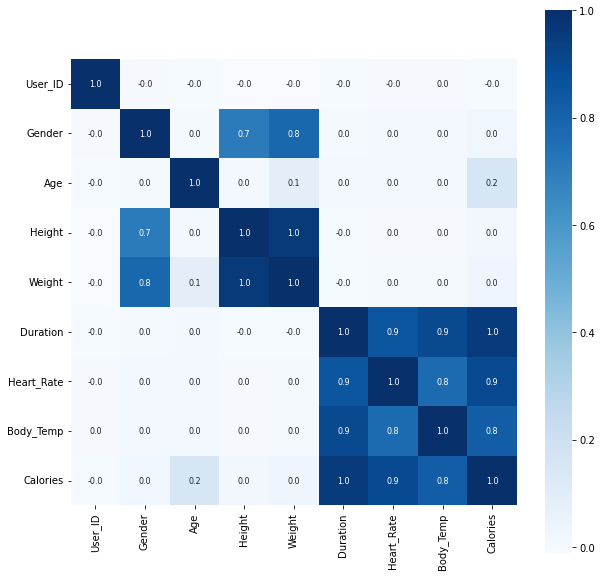

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, 
            annot_kws = {"size": 8}, cmap = "Blues")

In [28]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
X = calories_data.drop(columns = ["User_ID","Calories"], axis = 1)
y = calories_data["Calories"]

In [30]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [31]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]
  
for i in range(5):
    models[i].fit(X_train, y_train)
  
    print(f"{models[i]} : ")
  
    train_pred = models[i].predict(X_train)
    print("Training Error : ", mean_absolute_error(y_train, train_pred))
  
    val_pred = models[i].predict(X_test)
    print("Validation Error : ", mean_absolute_error(y_test, val_pred))
    print()

LinearRegression() : 
Training Error :  8.332985229896744
Validation Error :  8.38518805314718

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 
Training Error :  0.9656331550205747
Validation Error :  1.4804779006441435

Lasso() : 
Training Error :  9.049658999072935
Validation Error :  8.989469141792508

RandomForestRegressor() : 
Training Error :  0.69

In [36]:
regressor_model = XGBRegressor()

In [37]:
regressor_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [38]:
training_data_prediction = regressor_model.predict(X_train)

score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9995517443430838
Mean Absolute Error :  0.9656331550205747


In [39]:
test_data_prediction = regressor_model.predict(X_test)

score_1 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9988453127264426
Mean Absolute Error :  1.4804779006441435


In [40]:
input_data = (0,20,166.0,60.0,14.0,94.0,40.3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predict = regressor_model.predict(input_data_reshaped)
print(predict)

print("Calories Burnt : ", predict[0])

[278.99765]
Calories Burnt :  278.99765
